In [1]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

Using TensorFlow backend.


In [47]:
list_A = []
list_B = []
list_2D = []

list_label = []

num_iterations = 1000

for i in range(num_iterations):
    
    num_A = random.uniform(0,10)
    num_B = random.uniform(0,10)
    
    list_A.append(num_A)
    list_B.append(num_B)
    list_2D.append([num_A, num_B])
    
    label = int(num_A < num_B)
    list_label.append(label)
    

In [49]:
list_A = np.array(list_A)
list_B = np.array(list_B)
list_2D = np.array(list_2D)
list_label = np.array(list_label)

In [50]:
list_B.shape

(1000,)

In [31]:
def build_comparator_2_inputs():

    inputs_1 = keras.Input(shape=(1,))
    inputs_2 = keras.Input(shape=(1,))

    # Merge all available features into a single large vector via concatenation
    x = layers.concatenate([inputs_1, inputs_2])

    dense = layers.Dense(1, activation="relu")
    x = dense(x)
    outputs = layers.Dense(1, "softmax")(x)
    
    model = keras.Model(inputs=[inputs_1, inputs_2], 
                        outputs=outputs)

    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy", "mae"],
    )
    
    return model

In [52]:
model = build_comparator_2_inputs()

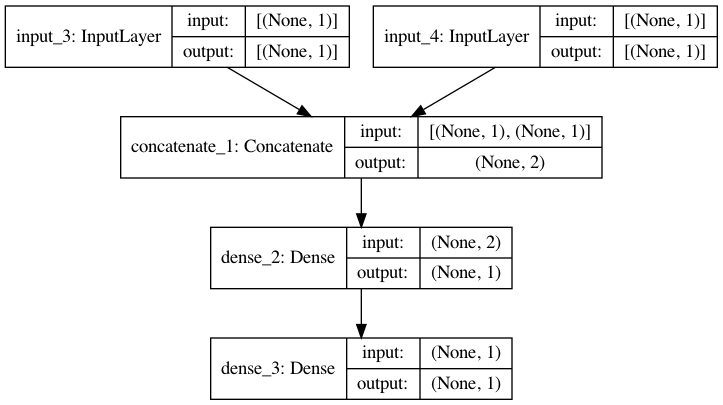

In [33]:
keras.utils.plot_model(model, show_shapes=True)

In [53]:
model.fit([list_A, list_B], 
                    list_label,
                    batch_size=64, 
                    epochs=20)

Epoch 1/20
16/16 [==============================] - 0s 671us/step - loss: 0.9306 - accuracy: 0.4770 - mae: 0.5230
Epoch 2/20
16/16 [==============================] - 0s 663us/step - loss: 0.8494 - accuracy: 0.4770 - mae: 0.5230
Epoch 3/20
16/16 [==============================] - 0s 543us/step - loss: 0.7841 - accuracy: 0.4770 - mae: 0.5230
Epoch 4/20
16/16 [==============================] - 0s 608us/step - loss: 0.7232 - accuracy: 0.4770 - mae: 0.5230
Epoch 5/20
16/16 [==============================] - 0s 576us/step - loss: 0.6691 - accuracy: 0.4770 - mae: 0.5230
Epoch 6/20
16/16 [==============================] - 0s 603us/step - loss: 0.6189 - accuracy: 0.4770 - mae: 0.5230
Epoch 7/20
16/16 [==============================] - 0s 641us/step - loss: 0.5710 - accuracy: 0.4770 - mae: 0.5230
Epoch 8/20
16/16 [==============================] - 0s 552us/step - loss: 0.5302 - accuracy: 0.4770 - mae: 0.5230
Epoch 9/20
16/16 [==============================] - 0s 592us/step - loss: 0.4954 - accur

In [54]:
def build_comparator_1_input():

	# create model
	model = tf.keras.Sequential()
	model.add(layers.Dense(2, input_dim=2, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model


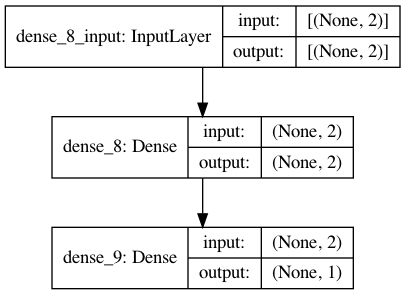

In [55]:
model = build_comparator_1_input()
keras.utils.plot_model(model, show_shapes=True)

In [56]:
model.fit([list_2D], 
                    list_label,
                    batch_size=64, 
                    epochs=20)

Epoch 1/20
16/16 [==============================] - 0s 584us/step - loss: 0.5338 - accuracy: 0.7640
Epoch 2/20
16/16 [==============================] - 0s 598us/step - loss: 0.4195 - accuracy: 0.7990
Epoch 3/20
16/16 [==============================] - 0s 633us/step - loss: 0.3335 - accuracy: 0.8430
Epoch 4/20
16/16 [==============================] - 0s 695us/step - loss: 0.2718 - accuracy: 0.8750
Epoch 5/20
16/16 [==============================] - 0s 671us/step - loss: 0.2343 - accuracy: 0.9080
Epoch 6/20
16/16 [==============================] - 0s 588us/step - loss: 0.2148 - accuracy: 0.9380
Epoch 7/20
16/16 [==============================] - 0s 539us/step - loss: 0.2038 - accuracy: 0.9610
Epoch 8/20
16/16 [==============================] - 0s 595us/step - loss: 0.1997 - accuracy: 0.9750
Epoch 9/20
16/16 [==============================] - 0s 535us/step - loss: 0.1972 - accuracy: 0.9810
Epoch 10/20
16/16 [==============================] - 0s 520us/step - loss: 0.1953 - accuracy: 0.9800

In [57]:
val_list_2D = []
val_list_label = []

num_iterations = 100

for i in range(num_iterations):
    
    num_A = random.uniform(0,10)
    num_B = random.uniform(0,10)
    
    val_list_2D.append([num_A, num_B])
    
    label = int(num_A < num_B)
    val_list_label.append(label)

In [58]:
# Evaluate model on validation data
eval_model = model.evaluate(val_list_2D, val_list_label)
eval_model

4/4 [==============================] - 0s 764us/step - loss: 0.2041 - accuracy: 0.9800


[0.20405395328998566, 0.9800000190734863]